#  Employee’s Performance for HR Analytics (Unsupervised Learning)

**📊 Dataset:** `Uncleaned_employees_final_dataset (1).csv`  
**📚 Source:** [Kaggle – HR Analytics: Employee Performance Dataset](https://www.kaggle.com/)  



### 🎯 Goal
Use **unsupervised learning (clustering)** to discover hidden employee groups based on demographics, performance, and experience.  
This helps HR understand workforce patterns and improve engagement and retention strategies.



### 📈 Description
By analyzing features like:
- `age`, `education`, `department`, `length_of_service`,  
- `no_of_trainings`, `previous_year_rating`, `KPIs_met_more_than_80`,  
- `awards_won`, and `avg_training_score`,  

the project identifies meaningful employee clusters to support **data-driven HR decisions**.


In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv(r"D:\cs year 3\ML\Employee-Segmentation-Clustering\Data\Uncleaned_employees_final_dataset (1).csv")

# Phase 1: Data Overview & Understanding

# Data Overview

In [4]:
# Check the number of rows and columns
print("Dataset Shape:", df.shape)

Dataset Shape: (17417, 13)


In [5]:
# Display first 5 rows to understand the structure
display(df.head())

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61


In [6]:
# Display sample 5 rows to understand the structure
display(df.sample(5))

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
2426,43100,Sales & Marketing,region_25,Bachelors,m,other,1,36,4.0,3,1,0,48
9395,60939,R&D,region_27,Bachelors,m,sourcing,1,32,3.0,4,0,0,88
3440,43684,HR,region_2,Masters & above,m,other,1,30,5.0,8,1,0,48
12832,6790,Procurement,region_2,Bachelors,f,sourcing,1,29,2.0,6,0,0,68
6036,20040,Sales & Marketing,region_6,Bachelors,f,other,1,29,5.0,3,1,0,45


In [7]:
# View dataset information (column types and null values)
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17417 entries, 0 to 17416
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            17417 non-null  int64  
 1   department             17417 non-null  object 
 2   region                 17417 non-null  object 
 3   education              16646 non-null  object 
 4   gender                 17417 non-null  object 
 5   recruitment_channel    17417 non-null  object 
 6   no_of_trainings        17417 non-null  int64  
 7   age                    17417 non-null  int64  
 8   previous_year_rating   16054 non-null  float64
 9   length_of_service      17417 non-null  int64  
 10  KPIs_met_more_than_80  17417 non-null  int64  
 11  awards_won             17417 non-null  int64  
 12  avg_training_score     17417 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.7+ MB


In [8]:
# Summary of numerical features
print("\nNumerical Summary:")
display(df.describe().T)


Numerical Summary:


,count,mean,std,min,25%,50%,75%,max
employee_id,17417.0,39083.491129,22707.024087,3.0,19281.0,39122.0,58838.0,78295.0
no_of_trainings,17417.0,1.250732,0.595692,1.0,1.0,1.0,1.0,9.0
age,17417.0,34.807774,7.694046,20.0,29.0,33.0,39.0,60.0
previous_year_rating,16054.0,3.345459,1.265386,1.0,3.0,3.0,4.0,5.0
length_of_service,17417.0,5.801860,4.175533,1.0,3.0,5.0,7.0,34.0
KPIs_met_more_than_80,17417.0,0.358845,0.479675,0.0,0.0,0.0,1.0,1.0
awards_won,17417.0,0.023368,0.151074,0.0,0.0,0.0,0.0,1.0
avg_training_score,17417.0,63.176322,13.418179,39.0,51.0,60.0,75.0,99.0


In [9]:
# Summary of categorical features
print("\nCategorical Summary:")
display(df.describe(include='object').T)


Categorical Summary:


,count,unique,top,freq
department,17417,9,Sales & Marketing,5458
region,17417,34,region_2,3918
education,16646,3,Bachelors,11519
gender,17417,2,m,12314
recruitment_channel,17417,3,other,9751


# Data Understanding

In [10]:
# Identify numerical and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [11]:
print("\nNumerical Columns:", num_cols.tolist())
print("Categorical Columns:", cat_cols.tolist())


Numerical Columns: ['employee_id', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met_more_than_80', 'awards_won', 'avg_training_score']
Categorical Columns: ['department', 'region', 'education', 'gender', 'recruitment_channel']


In [12]:
# Count unique values per column
print("\nUnique Values per Column:")
display(df.nunique().to_frame('Unique Values').T)


Unique Values per Column:


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
Unique Values,17414,9,34,3,2,3,9,41,5,34,2,2,61


C:\Users\nadin\AppData\Local\Temp\ipykernel_30524\245673322.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


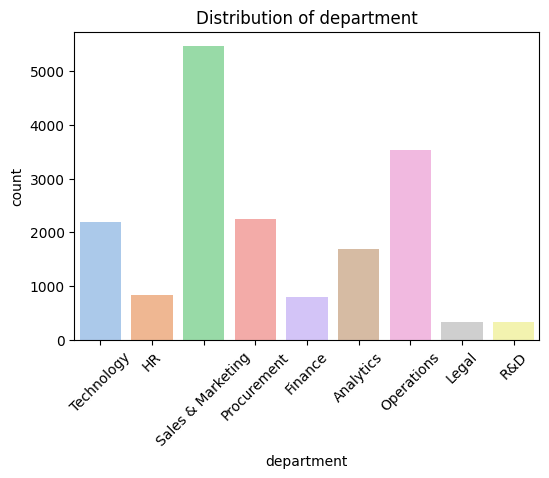

C:\Users\nadin\AppData\Local\Temp\ipykernel_30524\245673322.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


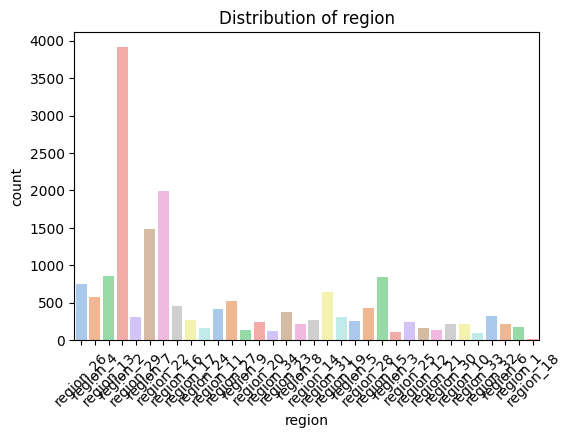

C:\Users\nadin\AppData\Local\Temp\ipykernel_30524\245673322.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


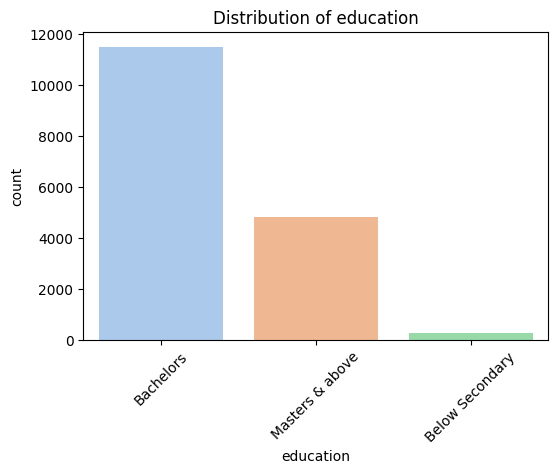

C:\Users\nadin\AppData\Local\Temp\ipykernel_30524\245673322.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


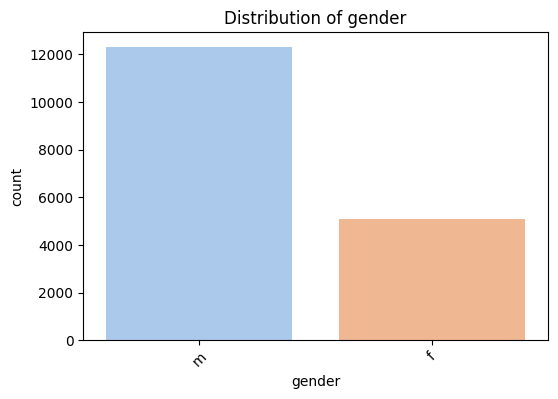

C:\Users\nadin\AppData\Local\Temp\ipykernel_30524\245673322.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


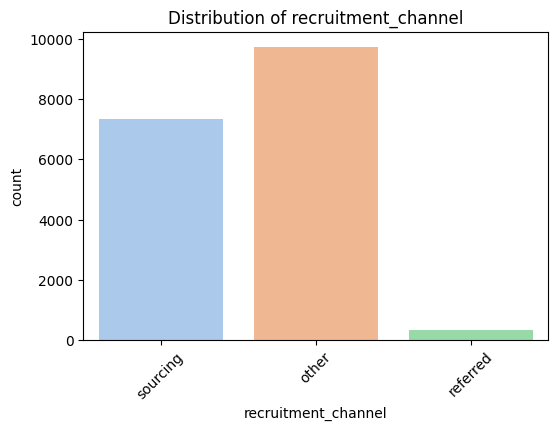

In [13]:
# Visualize distributions of first few categorical columns
for col in cat_cols[:5]:  # only show a few for readability
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df, palette='pastel')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

In [14]:
# Display the number of numerical and categorical columns
print(f"✅ Total Numerical Columns: {len(num_cols)}")
print(f"✅ Total Categorical Columns: {len(cat_cols)}")

✅ Total Numerical Columns: 8
✅ Total Categorical Columns: 5


#  Phase 2: Data Cleaning

In [15]:
# Check for Missing Values
print("🔹 Missing Values per Column:")
print(df.isnull().sum())

🔹 Missing Values per Column:
employee_id                 0
department                  0
region                      0
education                 771
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     1363
length_of_service           0
KPIs_met_more_than_80       0
awards_won                  0
avg_training_score          0
dtype: int64


Handle Missing Values 

In [16]:
# Fill missing 'education' values with the most frequent category (mode)
df['education'].fillna(df['education'].mode()[0], inplace=True)

C:\Users\nadin\AppData\Local\Temp\ipykernel_30524\1027314229.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['education'].fillna(df['education'].mode()[0], inplace=True)


In [17]:
# Fill missing 'previous_year_rating' with the median value
df['previous_year_rating'].fillna(df['previous_year_rating'].median(), inplace=True)

C:\Users\nadin\AppData\Local\Temp\ipykernel_30524\3627691423.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['previous_year_rating'].fillna(df['previous_year_rating'].median(), inplace=True)


In [18]:
# Verify that missing values are handled
print("✅ Missing values after filling:")
print(df.isnull().sum())

✅ Missing values after filling:
employee_id              0
department               0
region                   0
education                0
gender                   0
recruitment_channel      0
no_of_trainings          0
age                      0
previous_year_rating     0
length_of_service        0
KPIs_met_more_than_80    0
awards_won               0
avg_training_score       0
dtype: int64


Check for Duplicates

In [19]:
print("\n🔹 Number of duplicate rows:", df.duplicated().sum())


🔹 Number of duplicate rows: 2


 Remove duplicate rows

In [20]:
df.drop_duplicates(inplace=True)

In [21]:
# Confirm removal
print("✅ Duplicates removed successfully!")
print("🔹 New dataset shape:", df.shape)

✅ Duplicates removed successfully!
🔹 New dataset shape: (17415, 13)


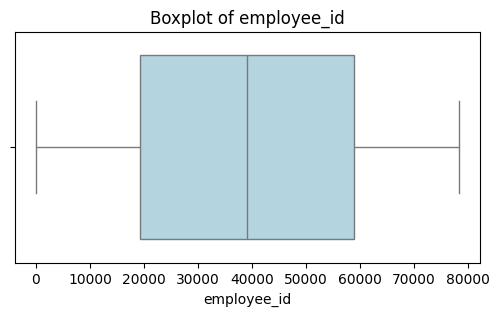

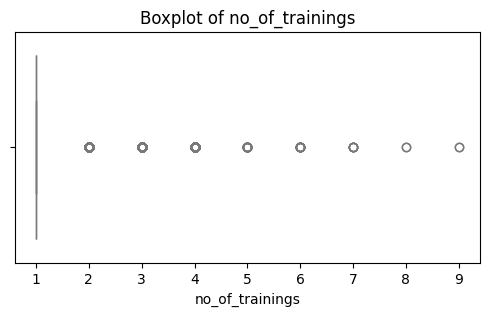

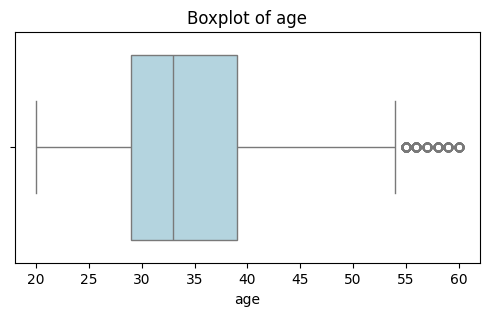

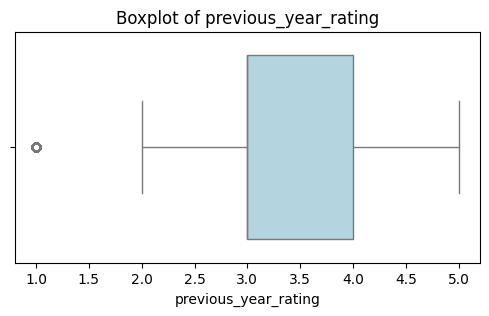

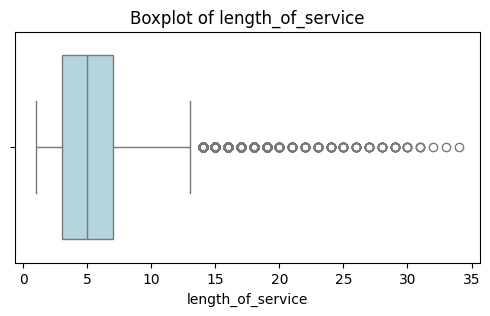

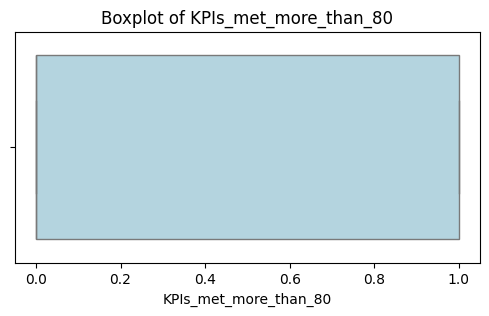

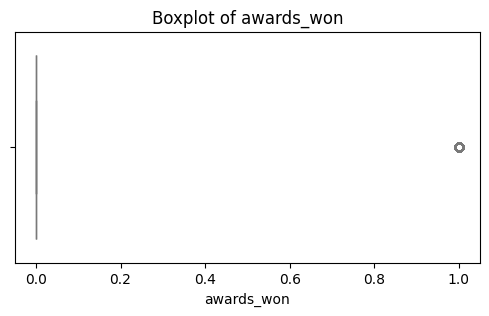

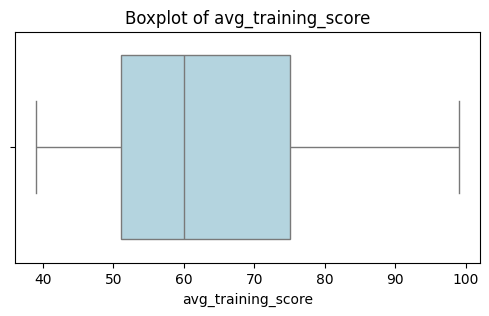

In [22]:
# Visual check for outliers in numerical columns
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f"Boxplot of {col}")
    plt.show()

In [23]:
# Handling outliers based on boxplot observations
num_cols = ['no_of_trainings', 'age', 'length_of_service', 'avg_training_score']

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Apply capping
    df[col] = df[col].apply(lambda x: upper if x > upper else (lower if x < lower else x))

print("✅ Outliers handled successfully!")

✅ Outliers handled successfully!


# Phase 3: EDA & Data Quality

#### 🔹 Univariate Analysis

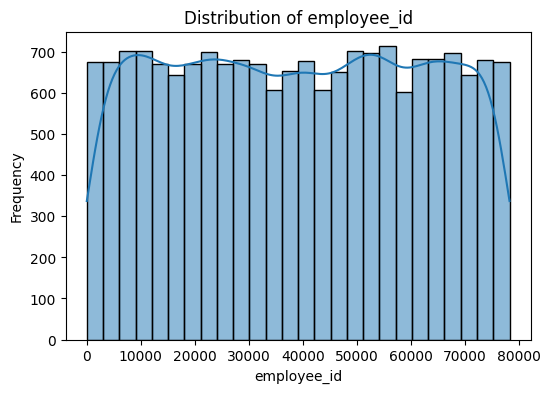

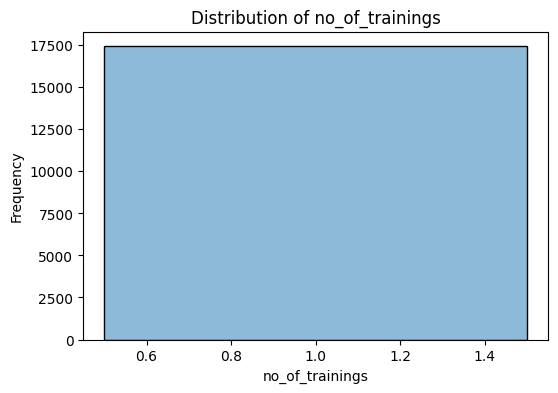

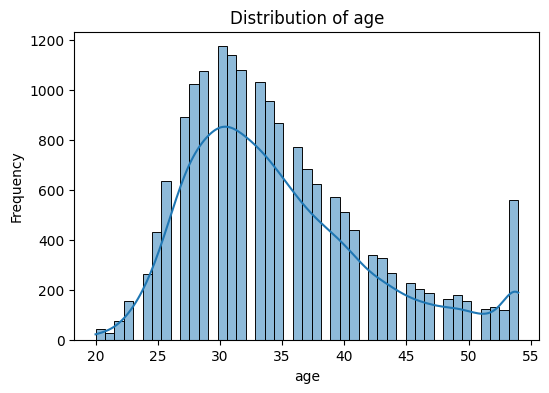

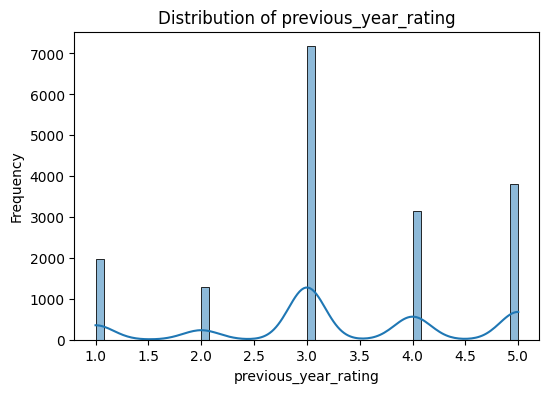

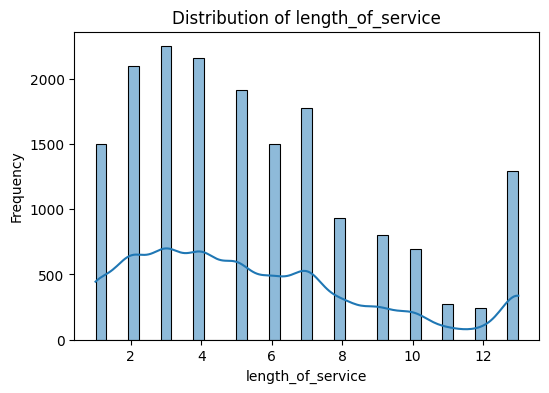

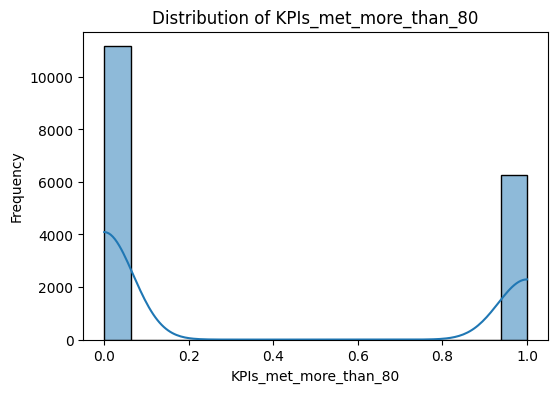

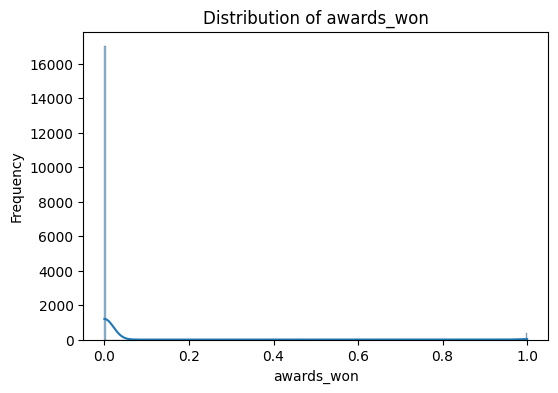

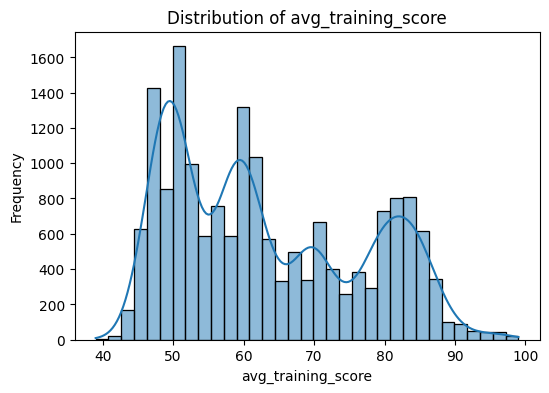

In [24]:
# Univariate analysis for numerical features
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

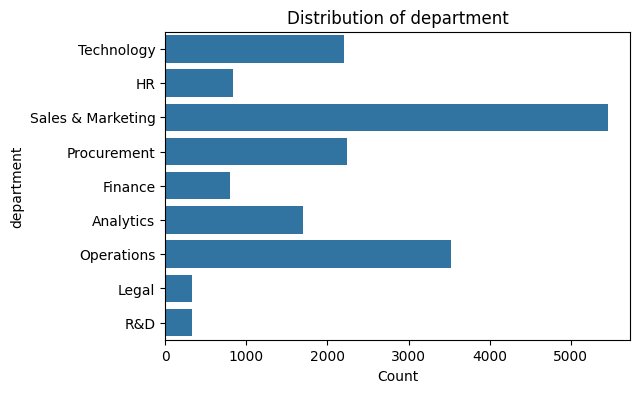

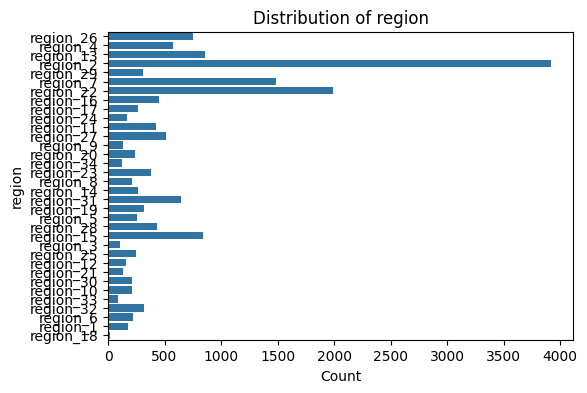

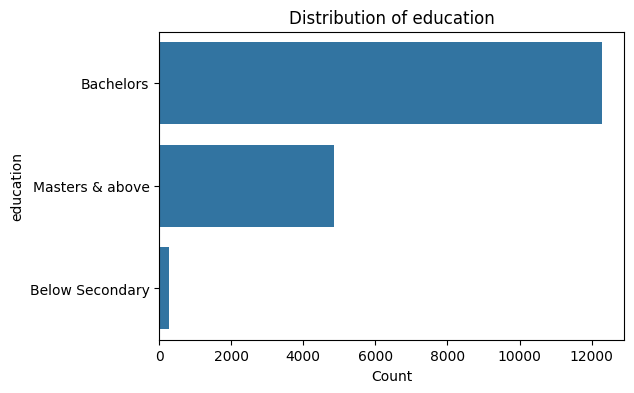

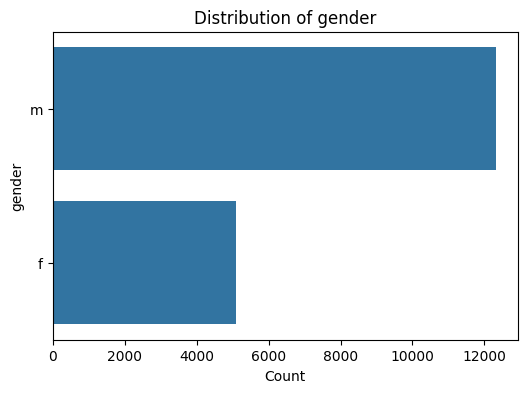

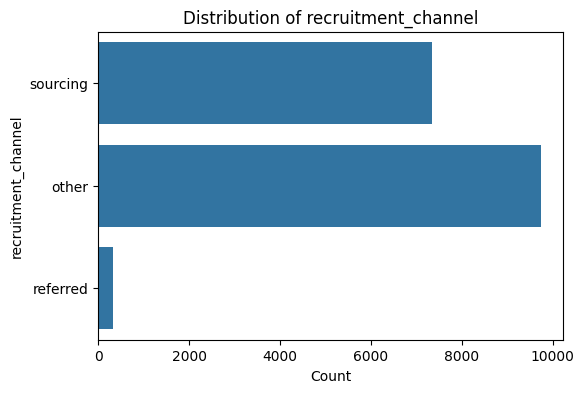

In [25]:
# Univariate analysis for categorical features
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(y=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.show()


#### 🔹 Bivariate Analysis

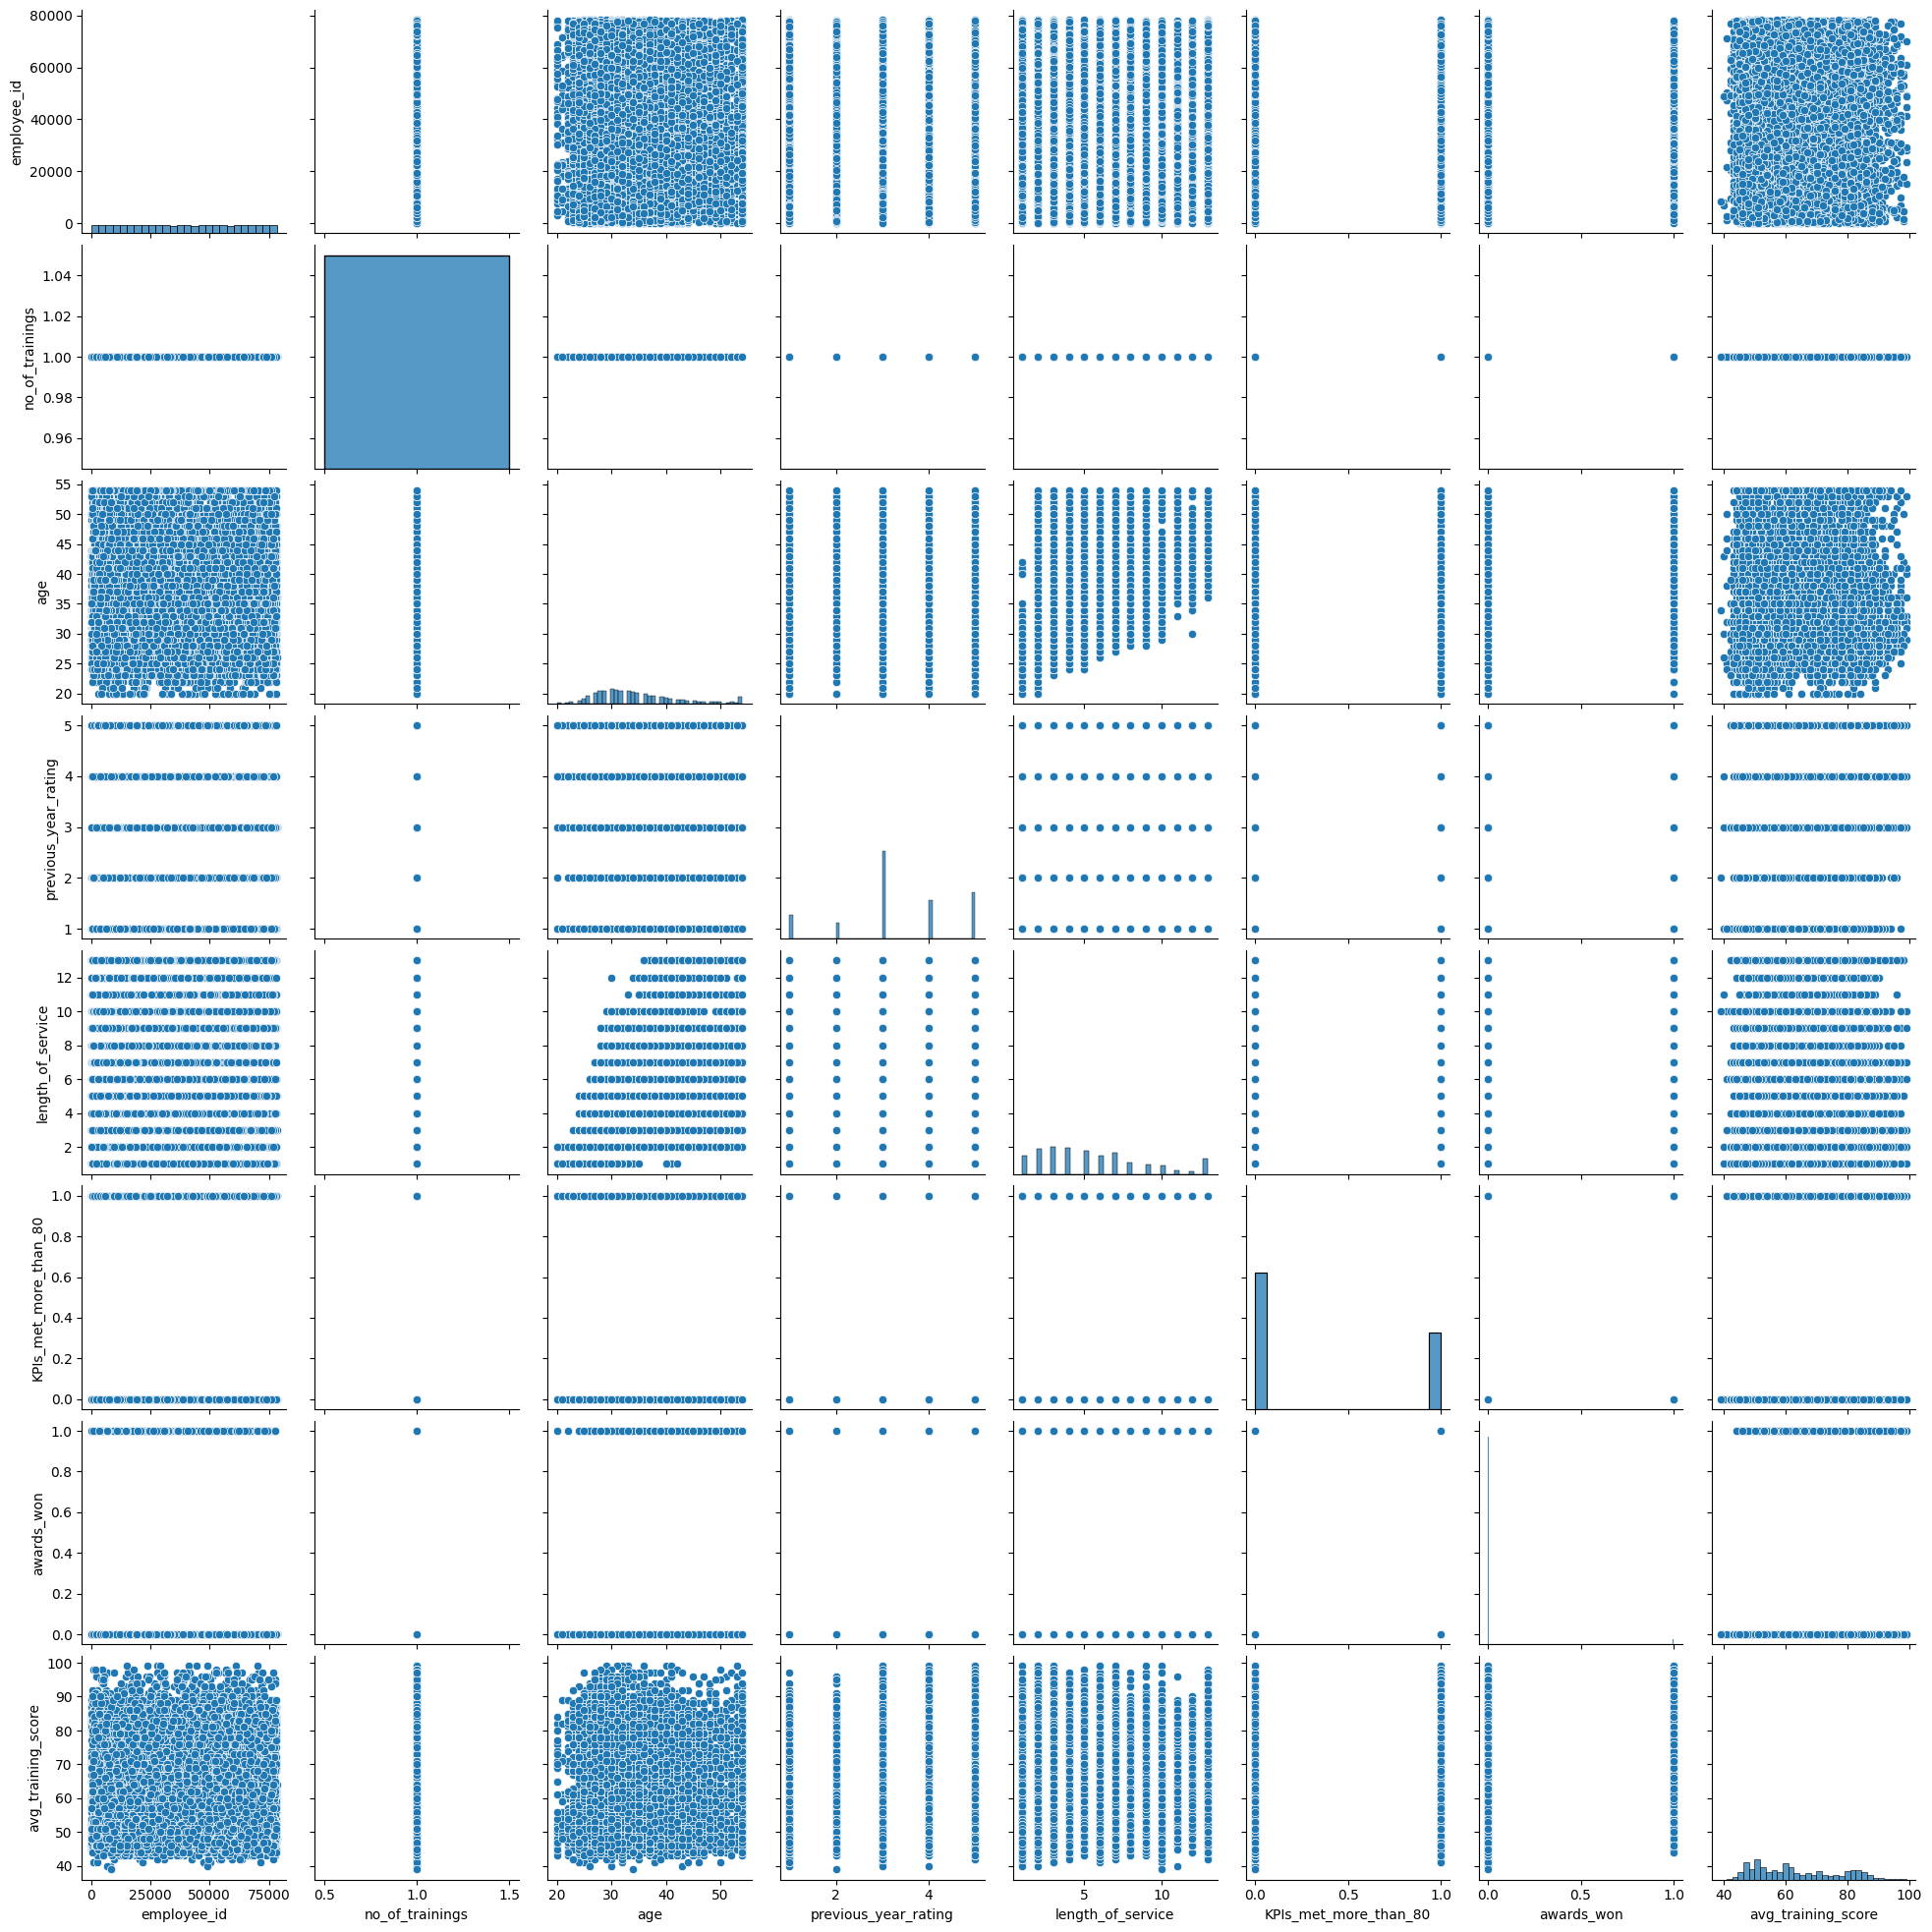

In [26]:
# Bivariate analysis between numerical features
sns.pairplot(df[num_cols])
plt.show()


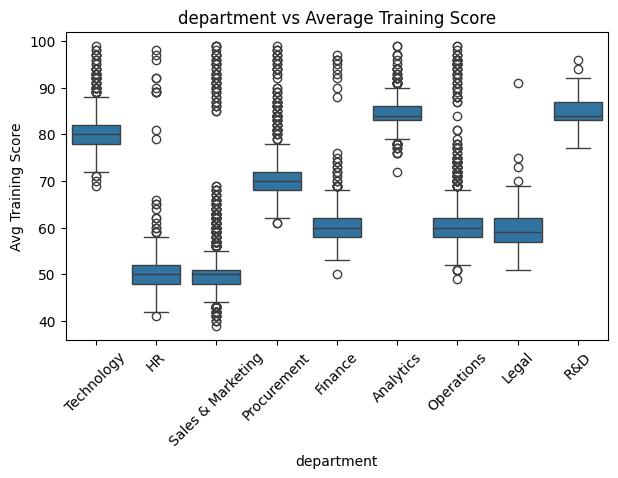

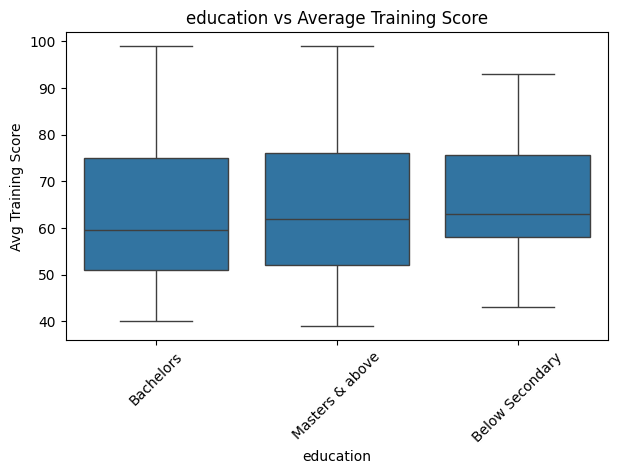

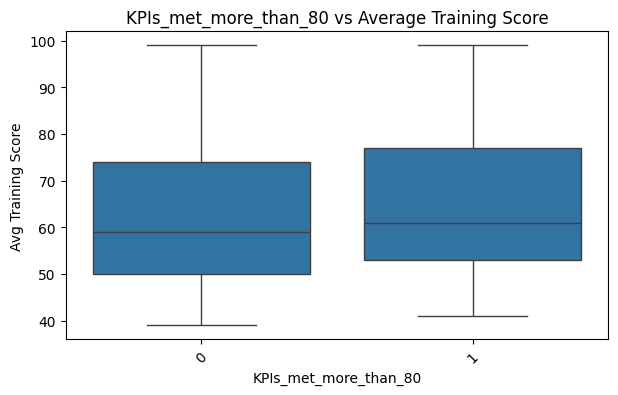

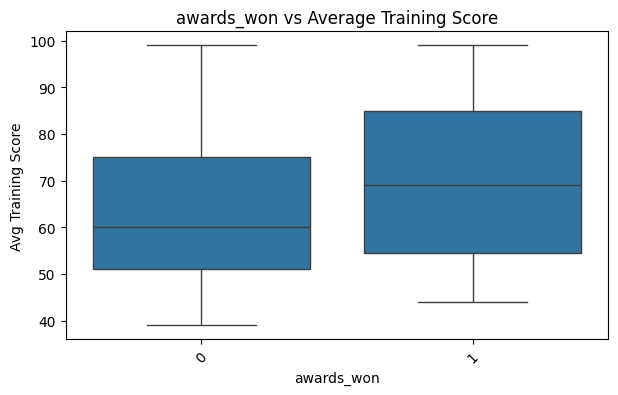

In [27]:
# Bivariate analysis: effect of categorical features on training score
categorical_features = ['department', 'education', 'KPIs_met_more_than_80', 'awards_won']

for col in categorical_features:
    plt.figure(figsize=(7,4))
    sns.boxplot(x=col, y='avg_training_score', data=df)
    plt.xticks(rotation=45)
    plt.title(f"{col} vs Average Training Score")
    plt.xlabel(col)
    plt.ylabel("Avg Training Score")
    plt.show()


#### 🔹 Correlation + Heatmap

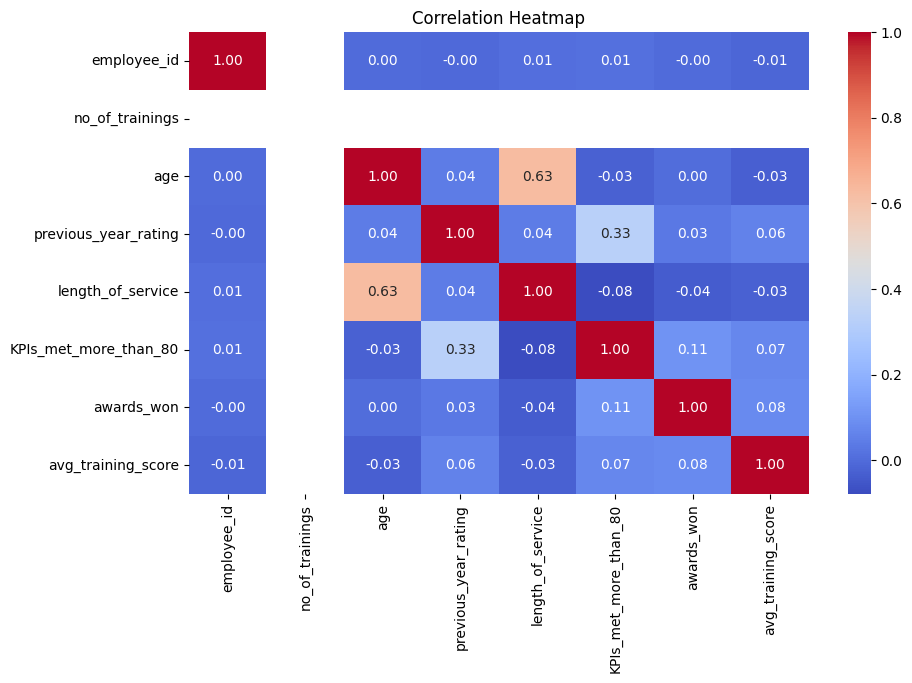

In [28]:
# Correlation analysis for numerical features
corr_matrix = df[num_cols].corr()

# Visualize correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#### 🔹 VIF (Multicollinearity)

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Prepare numerical data for VIF calculation
X = df[num_cols]

# Calculate VIF for each numerical feature
vif_df = pd.DataFrame()
vif_df["Feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i)
                 for i in range(X.shape[1])]

# Display VIF values
display(vif_df)


,Feature,VIF
0,employee_id,1.000480
1,no_of_trainings,57.500597
2,age,1.649774
3,previous_year_rating,1.129399
4,length_of_service,1.663531
5,KPIs_met_more_than_80,1.146649
6,awards_won,1.018503
7,avg_training_score,1.012737


## Exploratory Data Analysis (EDA) Summary

### Data Quality & Preprocessing
- Missing values in **education** and **previous_year_rating** were handled using mode and median.
- Duplicate records were removed.
- Outliers in **age**, **length_of_service**, **no_of_trainings**, and **avg_training_score** were treated using IQR capping.

###  Univariate Analysis Insights
- The majority of employees fall within the **25–40 age range**, indicating a relatively young workforce.
- Average training scores are generally centered around **moderate to high values**.
- Most employees did **not** receive awards and did **not** meet KPIs above 80%, suggesting improvement opportunities.

###  Bivariate Analysis Insights
- A positive relationship is observed between **previous_year_rating** and **average training score**, indicating consistency in performance.
- Employees who won awards tend to demonstrate **higher training scores**.
- Performance varies across **departments**, highlighting department-level differences.

###  Correlation Analysis
- A **moderate positive correlation** exists between *previous_year_rating* and *avg_training_score*.
- Length of service shows **weak correlation** with performance-related features, suggesting experience alone does not guarantee higher performance.

###  Multicollinearity Assessment (VIF)
- Variance Inflation Factor (VIF) values were within acceptable thresholds.
- No significant multicollinearity was detected, confirming the suitability of features for clustering.

### Conclusion
The EDA process provided a clear understanding of employee characteristics and performance patterns.  
The dataset is **clean, reliable, and well-prepared** for the next phase involving **feature engineering, scaling, and unsupervised learning techniques**.


# Phase 4: Data Preprocessing & Modeling


In [33]:
# Copy to avoid touching original dataframe
df_model = df.copy()

# Drop obvious non-informative columns if any (IDs, names, etc.)
drop_cols = []  # TODO: add if needed
df_model.drop(columns=drop_cols, inplace=True, errors='ignore')

# Identify column types
cat_cols = df_model.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = df_model.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical columns:", cat_cols)
print("Numerical columns:", num_cols)


Categorical columns: ['department', 'region', 'education', 'gender', 'recruitment_channel']
Numerical columns: ['employee_id', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met_more_than_80', 'awards_won', 'avg_training_score']


In [34]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)


In [35]:
X_processed = preprocessor.fit_transform(df_model)

print("Processed shape:", X_processed.shape)


Processed shape: (17415, 59)


## PCA for Dimensionality Reduction


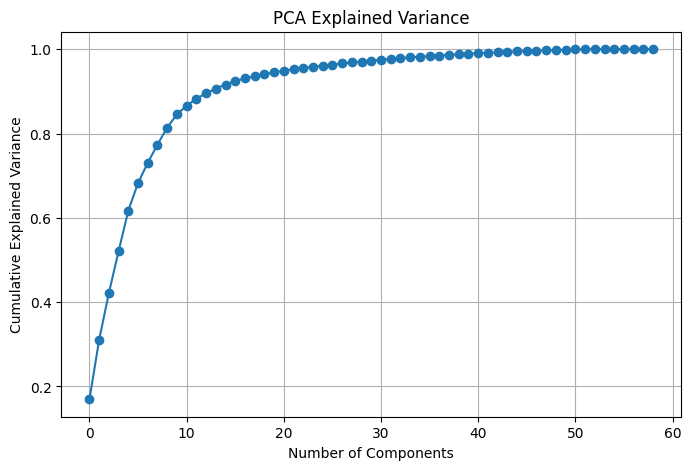

In [36]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca_full = PCA(random_state=42)
X_pca_full = pca_full.fit_transform(X_processed)

explained_var = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(explained_var, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.grid(True)
plt.show()


In [37]:
N_COMPONENTS = 0.9  # keep 90% variance

pca = PCA(n_components=N_COMPONENTS, random_state=42)
X_pca = pca.fit_transform(X_processed)

print("PCA shape:", X_pca.shape)


PCA shape: (17415, 14)


## Clustering Models & Evaluation


In [38]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

def evaluate_clustering(X, labels):
    return {
        "Silhouette": silhouette_score(X, labels),
        "Davies-Bouldin": davies_bouldin_score(X, labels),
        "Calinski-Harabasz": calinski_harabasz_score(X, labels)
    }


  **K-Means Clustering**


In [39]:
from sklearn.cluster import KMeans

k_values = range(2, 11)
kmeans_results = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_pca)
    
    scores = evaluate_clustering(X_pca, labels)
    scores["k"] = k
    kmeans_results.append(scores)

kmeans_df = pd.DataFrame(kmeans_results)
kmeans_df


,Silhouette,Davies-Bouldin,Calinski-Harabasz,k
0,0.135090,2.439243,2490.815599,2
1,0.141351,2.158534,2458.895956,3
2,0.156926,1.743237,2794.915845,4
3,0.145122,1.713103,2634.533683,5
4,0.124253,1.761984,2372.216345,6
5,0.137127,1.866096,2232.622217,7
6,0.128749,1.844917,2088.977318,8
7,0.129296,1.918558,1952.876579,9
8,0.129036,1.913469,1863.943827,10


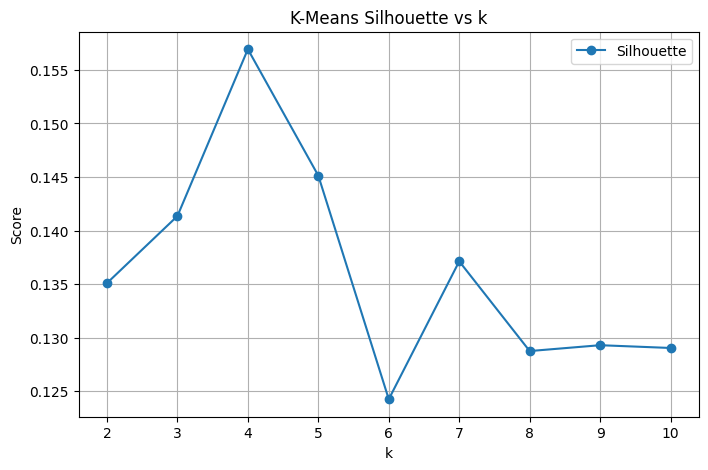

In [40]:
plt.figure(figsize=(8,5))
plt.plot(kmeans_df["k"], kmeans_df["Silhouette"], marker='o', label="Silhouette")
plt.xlabel("k")
plt.ylabel("Score")
plt.title("K-Means Silhouette vs k")
plt.grid(True)
plt.legend()
plt.show()


In [41]:
best_k = kmeans_df.sort_values("Silhouette", ascending=False).iloc[0]["k"]
best_k = int(best_k)

kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
kmeans_labels = kmeans_final.fit_predict(X_pca)

kmeans_scores = evaluate_clustering(X_pca, kmeans_labels)
best_k, kmeans_scores


(4,
 {'Silhouette': np.float64(0.15692632636314552),
  'Davies-Bouldin': np.float64(1.7432370714609569),
  'Calinski-Harabasz': np.float64(2794.915845239382)})

**Hierarchical Clustering**

In [42]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=best_k, linkage='ward')
agg_labels = agg.fit_predict(X_pca)

agg_scores = evaluate_clustering(X_pca, agg_labels)
agg_scores


{'Silhouette': np.float64(0.13573856785039276),
 'Davies-Bouldin': np.float64(1.9230548235285774),
 'Calinski-Harabasz': np.float64(2393.2500114459485)}

**DBSCAN Clustering**

In [43]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_pca)

# remove noise for evaluation
mask = dbscan_labels != -1

dbscan_scores = evaluate_clustering(X_pca[mask], dbscan_labels[mask])
dbscan_scores


{'Silhouette': np.float64(0.14422690643866293),
 'Davies-Bouldin': np.float64(0.9029468688563427),
 'Calinski-Harabasz': np.float64(72.4154597766232)}

## Model Selection Summary


In [44]:
results = pd.DataFrame([
    {"Model": "KMeans", **kmeans_scores},
    {"Model": "Hierarchical", **agg_scores},
    {"Model": "DBSCAN", **dbscan_scores}
])

results


,Model,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,KMeans,0.156926,1.743237,2794.915845
1,Hierarchical,0.135739,1.923055,2393.250011
2,DBSCAN,0.144227,0.902947,72.415460


## Save Final Model


In [45]:
import os
import joblib
from sklearn.pipeline import Pipeline

# go up one directory from Notebooks/
MODEL_DIR = os.path.join("..", "Model")

os.makedirs(MODEL_DIR, exist_ok=True)

model_path = os.path.join(MODEL_DIR, "final_clustering_model.pkl")

final_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("pca", pca),
    ("clustering", kmeans_final)
])

joblib.dump(final_pipeline, model_path)
print(f"Final model saved at: {model_path}")


Final model saved at: ..\Model\final_clustering_model.pkl
